# MNIST TIME

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier


In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame = False, parser="auto")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# Assigning the data to some variables
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

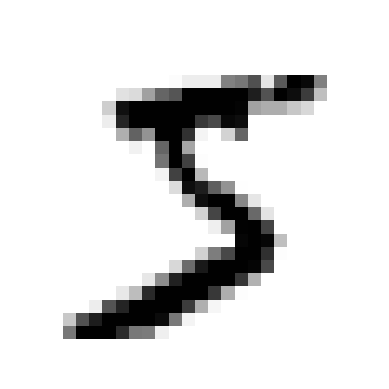

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [7]:
# Turning all the labels from strings to ints
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], shape=(70000,), dtype=uint8)

In [8]:
# slicing up the test train split, pre shuffled by sklearn

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# Creating lists of bools for if a label is or is not five, this is for binary classification which is where this chapter
# wants to show us first

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
y_train_5

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [11]:
# Train up an SGD classifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:

sgd_clf.predict([some_digit])

array([ True])

In [13]:
# So to remember, cross val score returns the scores of the model and cross val predict returns a set of predictions
# i can use for other stuff.

cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [14]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [15]:
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]])

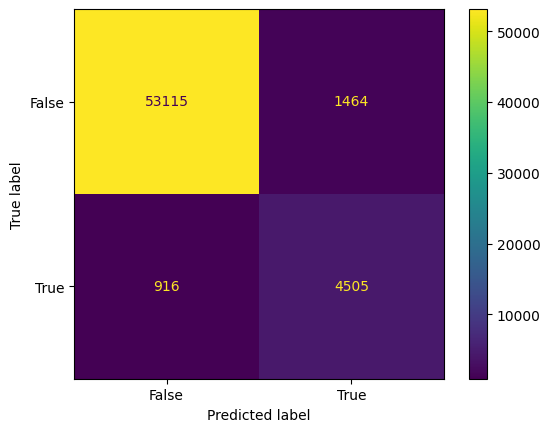

In [16]:
# Da giga way to look at the conf matrix
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)

In [17]:
precision_score(y_train_5, y_train_pred)

0.7547327860613168

In [18]:
recall_score(y_train_5, y_train_pred)

0.8310274857037447

In [19]:
f1_score(y_train_5, y_train_pred)

0.7910447761194029

In [20]:
# In my opinion the better way to do this is like this

cross_val_score(sgd_clf, X_train, y_train_pred, cv=5, scoring="precision")

array([0.86630435, 0.82094082, 0.7248996 , 0.70333988, 0.86601942])

In [21]:
cross_val_score(sgd_clf, X_train, y_train_pred, cv=5, scoring="recall")

array([0.66750419, 0.90619765, 0.90703518, 0.89949749, 0.74769489])

In [22]:
cross_val_score(sgd_clf, X_train, y_train_pred, cv=5, scoring="f1_macro")

array([0.86513067, 0.92263494, 0.89065516, 0.88124385, 0.89118012])

In [23]:
# FUcking with the threshold for these scores, never did this before

y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [24]:
# set the threshold to 0 and predict against it.

threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [25]:
# now shift the threshold to be higher then the decision score

threshold = 3000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [26]:
# like butter

In [27]:
# The image is a 5 so increasing the threshold decreases the recall making the model more precise, do the opposite
# to catch more instances, this will obvs make the model less accurate but capture everytime some is correct...

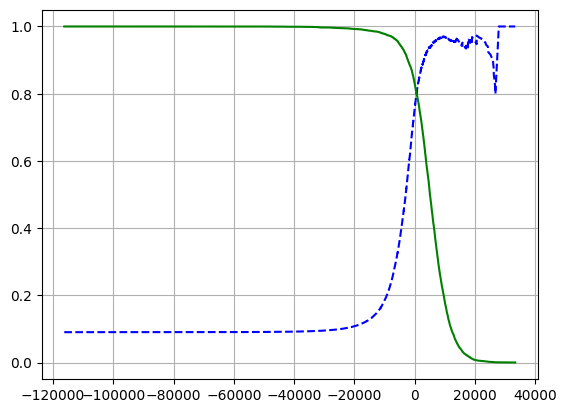

In [28]:
# Now we can do this in the way that i perfer to do it....

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method="decision_function") # didnt know you could do method with predict

# stealing the next thing as i havent does this before either

pre, rec, thres = precision_recall_curve(y_train_5, y_scores)

def plot_prvt(prec, rec, thres):
    plt.plot(thres, prec[:-1], "b--", label="Precision")
    plt.plot(thres, rec[:-1], "g-", label="Recall")
    plt.grid()

plot_prvt(pre, rec, thres)

In [29]:
# The book continues to just pump out coded functions for this curve and that curve, I rememeber doing ROC curves.... they kinda bore me
# I dont see i real good reason for them and I know im wrong on that statement but kinda until it becomes useful I find it hard to focus
# on learning them... silly I know.

In [30]:
# AUC is abit better as its a metric we can use
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9648211175804801)

In [31]:
# Rando time

# rnd_clf = RandomForestClassifier(random_state=42)
# y_proba = cross_val_predict(rnd_clf, X_train, y_train, cv=5, method="predict_proba")

# y_scores_forest = y_proba[:,1]

# roc_auc_score(y_train_5, y_scores_forest)

# Multiclass classificatio

In [32]:
from sklearn.svm import SVC

In [33]:
svm = SVC()
svm.fit(X_train, y_train)
svm.predict([some_digit])

array([5], dtype=uint8)

In [34]:
# The time its taking to load up all the cells so far to do multiclass is longer than me reading the whole section... im now on multilabel..
# Multiclass is simple enought

# Multilabel Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_multilabel)

KNeighborsClassifier(n_jobs=-1)

In [36]:
knn.predict([some_digit])

array([[False,  True]])

In [37]:
cross_val_score(knn, X_train, y_train, cv=3, scoring="f1_macro", n_jobs=-1)

array([0.96743908, 0.96688195, 0.9673281 ])

In [38]:
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [39]:
knn.fit(X_train, y_multilabel)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [41]:
cross_val_score(knn, X_train, y_train, cv=3, scoring="f1_macro")

array([0.96202477, 0.96178737, 0.96434512])

# Doing some fucked up shit

In [42]:
X_train.shape

# X_train[0].reshape(28,28)

(60000, 784)

In [43]:
def shift(dataframe, direction):
    new_image = np.zeros((28,28), dtype=np.uint8)
    reshaped = dataframe.reshape(28,28)

    if direction == "up":
        new_image[:-1,:] = reshaped[1:,:]
    elif direction == "down":
        new_image[1:, :] = reshaped[:-1,:]
    elif direction == "left":
        new_image[:,:-1] = reshaped[:,1:]
    elif direction == "right":
        new_image[:,1:] = reshaped[:,:-1]
    
    return new_image.flatten()

right_shifted = np.zeros_like(X_train)
left_shifted = np.zeros_like(X_train)
up_shifted = np.zeros_like(X_train)
down_shifted = np.zeros_like(X_train)

for i in range(X_train.shape[0]):
    right_shifted[i] = shift(X_train[i], "right")
    left_shifted[i] = shift(X_train[i], "left")
    down_shifted[i] = shift(X_train[i], "down")
    up_shifted[i] = shift(X_train[i], "up")


In [44]:
right_shifted.shape
left_shifted.shape
down_shifted.shape
up_shifted.shape

(60000, 784)

In [45]:
combined = []
combined.append([right_shifted, left_shifted, up_shifted, down_shifted, X_train])

In [46]:
giga_train = np.array(combined).reshape(-1, 784)

In [47]:
giga_train.shape

(300000, 784)

In [48]:
y_train.shape

(60000,)

In [49]:
y_combined = []
y_combined.append([y_train, y_train, y_train, y_train, y_train])
giga_y = np.array(y_combined).reshape(-1)

In [50]:
giga_y.shape

(300000,)

In [51]:
knn_combined = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [52]:
knn_combined.fit(giga_train, giga_y)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [1]:
cross_val_score(knn_combined, giga_train, giga_y, cv = 3, scoring="f1_macro")

NameError: name 'cross_val_score' is not defined

Conclusion is that my coomputer is taking so long to train right now that Im not gonna try to optimize this, but by adding 4 extra versions of the set, each with the image shifted by one row or column, didnt help this particular algo.

# SPAM CLASSIFIER

In [ ]:
# Took this function from the example on the git as it is just retrieving the data from the interwebs

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

In [ ]:
fetch_spam_data()

Ok so i looked at the full git example.... it is hours of function making for parsing emails and this really isnt something im down for as I would prefer to do this workflow on something im more interested in at the moment since I have free time and im not forced to work on things I dont really care for. There are several things I could try and do this on but since ive technically already done this last tri, ill just move on for now and when I get another interesting Idea, ill just re run through the basic classifier workflow, tho tbh, I did do it alot last sem on very boring problems, tho they werent boring at the time as it was all new to me, now i wanna try use my knowledge on problems I encounter daily to see if i can take a problem i see and convert to a solution..... anyway, enough typing for now.